# Optimization of modeling parameters

## Load previous data

In [2]:
from pytadbit import load_chromosome

In [3]:
crm = load_chromosome('results/fragment/crm18.tdb')

In [4]:
t0, t60 = crm.experiments

In [5]:
t0

Experiment T0 (resolution: 100 kb, TADs: 53, Hi-C rows: 804, normalized: None)

Load raw data matrices, and normalized matrices

In [7]:
t60.load_hic_data('results/fragment/both_T60/04_normalizing/100000_raw/18.mat')
t60.load_norm_data('results/fragment/both_T60/04_normalizing/100000_norm/18.mat')

t0.load_hic_data('results/fragment/both_T0/04_normalizing/100000_raw/18.mat')
t0.load_norm_data('results/fragment/both_T0/04_normalizing/100000_norm/18.mat')

Check that the data is there:

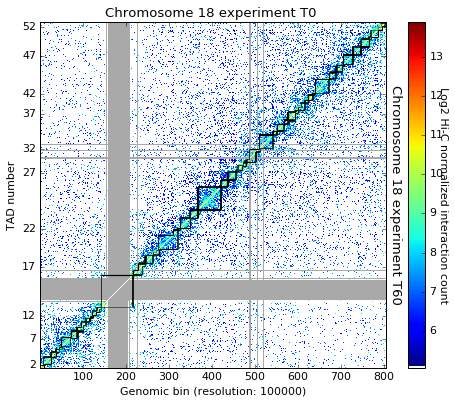

In [8]:
crm.visualize([('T0', 'T60')], normalized=True, paint_tads=True)

Decide which region to model.

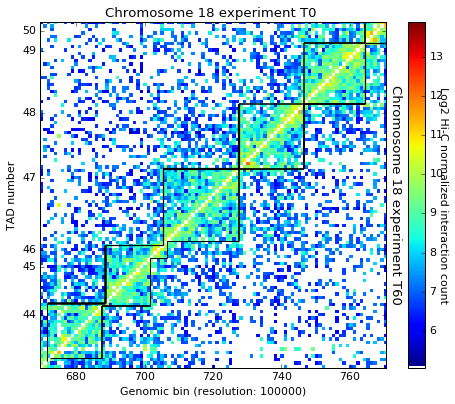

In [9]:
crm.visualize([('T0', 'T60')], normalized=True, paint_tads=True, focus=(670, 770))

## Optimization of parameters

We are going to optimize these parameters for both experiments:
 - maxdit: maximum distance associated to the minimum amount of interactions
 - upfreq: minimum amount of interactions that defines attraction
 - lowfreq: maximum number of interactions that defines repulsion
 - dcutoff: the definition of "contact" in units of bead diameter. Value of 2 means that a contact will occur when 2 beads are closer than 2 times their diameter. This will be used to compare 3D models with Hi-C interaction maps.

In [20]:
opt_t0 = t0.optimal_imp_parameters(start=685, end=750, n_models=40, n_keep=20, n_cpus=8, 
                                   upfreq_range=(0, 0.6, 0.3),
                                   lowfreq_range=(-0.9, 0, 0.3),
                                   maxdist_range=(1000, 2000, 500), 
                                   dcutoff_range=[1.5, 2, 2.5])

Optimizing 66 particles
# num  upfrq  lowfrq maxdist  scale  cutoff    corr


    1      0    -0.9    1000   0.01     1.5  0.7234
    2      0    -0.6    1000   0.01     1.5  0.7314
    3      0    -0.3    1000   0.01     1.5  0.7293
    4      0       0    1000   0.01     1.5  0.7322
    5    0.3    -0.9    1000   0.01     1.5  0.7131
    6    0.3    -0.6    1000   0.01       2  0.7253
    7    0.3    -0.3    1000   0.01     1.5  0.7343
    8    0.3       0    1000   0.01       2  0.725
    9    0.6    -0.9    1000   0.01       2  0.7092
   10    0.6    -0.6    1000   0.01       2  0.7087
   11    0.6    -0.3    1000   0.01       2  0.7073
   12    0.6       0    1000   0.01       2  0.7023
   13      0    -0.9    1500   0.01       2  0.7388
   14      0    -0.6    1500   0.01       2  0.7441
   15      0    -0.3    1500   0.01       2  0.7382
   16      0       0    1500   0.01       2  0.7415
   17    0.3    -0.9    1500   0.01       2  0.7437
   18    0.3    -0.6    1500   0.01       2  0.7477
   19    0.3    -0.3    1500   0.01       2  0.738
   20    0.3  

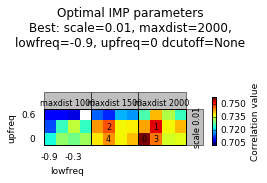

In [21]:
opt_t0.plot_2d(show_best=5)

Refine optimization in a small region:

In [22]:
opt_t0.run_grid_search(upfreq_range=(0, 0.3, 0.3), lowfreq_range=(-0.6, -0.3, 0.3),
                       maxdist_range=[1750], 
                       dcutoff_range=[1.5, 2],
                       n_cpus=8)

Optimizing 66 particles
# num  upfrq  lowfrq maxdist  scale  cutoff    corr


    1      0    -0.6    1750   0.01       2  0.7505
    2      0    -0.3    1750   0.01       2  0.7382
    3    0.3    -0.6    1750   0.01       2  0.7462
    4    0.3    -0.3    1750   0.01       2  0.7464


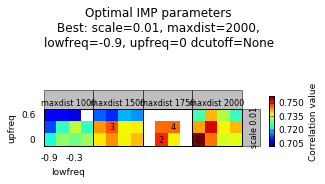

In [23]:
opt_t0.plot_2d(show_best=5)

In [24]:
opt_t0.run_grid_search(upfreq_range=(0, 0.3, 0.3), lowfreq_range=(-0.3, 0, 0.1),
                       maxdist_range=[2000, 2250], 
                       dcutoff_range=[1.5, 2],
                       n_cpus=8)

   xx      0    -0.3    2000   0.01       2  0.7359


Optimizing 66 particles
# num  upfrq  lowfrq maxdist  scale  cutoff    corr


    1      0    -0.2    2000   0.01     1.5  0.723
    2      0    -0.1    2000   0.01       2  0.7342
   xx      0       0    2000   0.01     1.5  0.7366
   xx    0.3    -0.3    2000   0.01     1.5  0.7381
    3    0.3    -0.2    2000   0.01     1.5  0.7425
    4    0.3    -0.1    2000   0.01       2  0.7466
   xx    0.3       0    2000   0.01       2  0.7417
    5      0    -0.3    2250   0.01     1.5  0.737
    6      0    -0.2    2250   0.01     1.5  0.7499
    7      0    -0.1    2250   0.01     1.5  0.7482
    8      0       0    2250   0.01     1.5  0.7396
    9    0.3    -0.3    2250   0.01     1.5  0.7465
   10    0.3    -0.2    2250   0.01       2  0.7441
   11    0.3    -0.1    2250   0.01     1.5  0.7437
   12    0.3       0    2250   0.01       2  0.7439


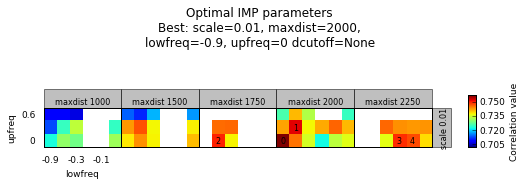

In [25]:
opt_t0.plot_2d(show_best=5)

In [ ]:
opt_t0.run_grid_search(upfreq_range=(0, 0.3, 0.1), lowfreq_range=(-0.3, 0, 0.1),
                       n_cpus=8,
                       maxdist_range=[2000, 2250], 
                       dcutoff_range=[1.5, 2])

   xx      0    -0.3    2000   0.01       2  0.7359
   xx      0    -0.2    2000   0.01     1.5  0.723
   xx      0    -0.1    2000   0.01       2  0.7342
   xx      0       0    2000   0.01     1.5  0.7366


Optimizing 66 particles
# num  upfrq  lowfrq maxdist  scale  cutoff    corr


    1    0.1    -0.3    2000   0.01       2  0.7465


In [ ]:
opt_t0.plot_2d(show_best=5)

In [26]:
opt_t0.get_best_parameters_dict()

{'dcutoff': 2.0,
 'kforce': 5,
 'lowfreq': -0.9,
 'maxdist': 2000.0,
 'reference': '',
 'scale': 0.01,
 'upfreq': 0.0}

For the other replicate, we can reduce the space of search:

In [13]:
opt_t60 = t60.optimal_imp_parameters(start=685, end=750, n_models=40, n_keep=20, n_cpus=8, 
                                     upfreq_range=(0, 0.6, 0.3),
                                     lowfreq_range=(-0.9, -0.3, 0.3),
                                     maxdist_range=(1500, 2000, 500), 
                                     dcutoff_range=[1.5, 2])

Optimizing 66 particles
# num  upfrq  lowfrq maxdist  scale  cutoff    corr


    1      0    -0.9    1500   0.01       2  0.7506
    2      0    -0.6    1500   0.01       2  0.7491
    3      0    -0.3    1500   0.01       2  0.7283
    4    0.3    -0.9    1500   0.01       2  0.717
    5    0.3    -0.6    1500   0.01       2  0.7165
    6    0.3    -0.3    1500   0.01       2  0.715
    7    0.6    -0.9    1500   0.01       2  0.7154
    8    0.6    -0.6    1500   0.01       2  0.7148
    9    0.6    -0.3    1500   0.01       2  0.7234
   10      0    -0.9    2000   0.01       2  0.7469
   11      0    -0.6    2000   0.01       2  0.7555
   12      0    -0.3    2000   0.01       2  0.745
   13    0.3    -0.9    2000   0.01       2  0.7387
   14    0.3    -0.6    2000   0.01     1.5  0.7311
   15    0.3    -0.3    2000   0.01     1.5  0.7352
   16    0.6    -0.9    2000   0.01       2  0.7322
   17    0.6    -0.6    2000   0.01     1.5  0.7379
   18    0.6    -0.3    2000   0.01     1.5  0.7341


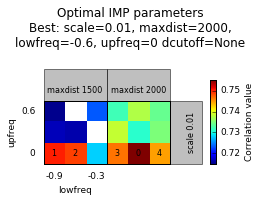

In [17]:
opt_t60.plot_2d(show_best=5)

In [19]:
opt_t60.get_best_parameters_dict()

{'dcutoff': 2.0,
 'kforce': 5,
 'lowfreq': -0.6,
 'maxdist': 2000.0,
 'reference': '',
 'scale': 0.01,
 'upfreq': 0.0}